In [2]:
## 캐글 디짓 리코그나이져

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
from sklearn.preprocessing import MinMaxScaler



In [52]:
# MNIST 데이터 다운로드
# 이미지 파일 데이타 셋이 폴더에 다운로드 받아진다
from tensorflow.examples.tutorials.mnist import input_data
# Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [57]:
img_data_test_df = pd.read_csv("./digit_recog/test.csv")
#test_df = pd.read_csv("./data/titanic/test.csv")

#train
print(img_data_test_df.shape)

(28000, 784)


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

{'whiskers': [<matplotlib.lines.Line2D at 0x1c0d68aa4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0d68aab38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0d68aa198>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0d6f7f208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0d6f7f550>],
 'means': []}

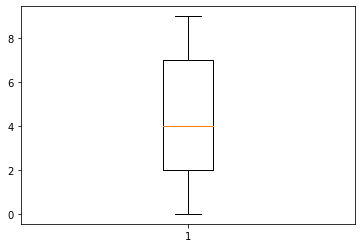

In [5]:
##
img_data_df = pd.read_csv("./digit_recog/train.csv")
print(img_data_df)
## 결측치 확인
img_data_df.isnull().sum(axis=0) # 확인된결과

# plt.boxplot(img_data_df["label"])
# 내 생각에은 이상치 확인 할 필요 없을듯



In [41]:
# 트레이닝, 테스트 데이타 셋
# 을 잘라서 나눌 필요가 없다 왜냐면 테스트 파일이 잇으니깐

train_x_data = img_data_df[img_data_df.columns[1:]]
train_y_data = img_data_df["label"]

#print(train_x_data)
#print(train_y_data)

train_y_data = pd.get_dummies(train_y_data)
train_y_data_1 = train_y_data
#sess = tf.Session()
# one hot encoding label  해준다 뎁스를 9로 잡아줌
#train_y_data = sess.run(tf.one_hot(train_y_data, 10))
print(train_x_data)
print(train_y_data)
print(train_y_data_1)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [16]:
print(len(img_data_df))

42000


In [48]:
## scaling normalization을 진행
scaler = MinMaxScaler()

x_data = scaler.fit_transform(img_data_df[img_data_df.columns[1:]])

train_x_data = x_data

#print(x_data.max())

print(x_data)

1.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [167]:
# tensorflow로 머신러닝

# placeholder 
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([784,10]), name="weight")
b = tf.Variable(tf.random_normal([10]), name="bias")

# Hypothesis
logit = tf.matmul(X, W) + b
H = tf.nn.softmax(logit)
# Cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels = Y) )
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

# session initializatin
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [55]:
# 학습 batch를 쓰지 않으면 상대적으로 학습이 제대로 안된다

# 데이터 사이즈를 보고 전체 epoch수를 판단
# epoch수를 많으면 많을 수록 학습의 효과 가 늘어나지만 시간이 너무 걸린다
# 따라서 적절한 epoch수를 결정
train_epoch = 300

# 배치 사이즈를 설정해서 실제 데이터를 몇 개씩 나눠서 학습할 지 생각해준다
batch_size = 100

# # 피드 딕트에 X 쪽 이미지 밸류 Y 쪽 이미지 밸류
# for step in range(train_epoch):
    
#     #  학습용 데이터에서 100개씩 뜯어오는 느낌이다
#     num_of_iter = int( len(img_data_df) / batch_size )
#     cost_val =0
    
#     for i in range(num_of_iter):
#         batch_x, batch_y = mnist.train.next_batch(batch_size)
#         # X 랑 Y를 batch_x batch_y
#         _, cost_val = sess.run([train,cost], feed_dict={X:batch_x, 
#                                                     Y:batch_y})
#     if step % 3 == 0:
#         print("Cost value: {}".format(cost_val))
        
# 요 아래는 배치 사이즈를 쓰지않고 학습하지 않았을 떄 

for step in range(train_epoch):
    
    #  학습용 데이터에서 100개씩 뜯어오는 느낌이다
    # X 랑 Y를 batch_x batch_y
    _, cost_val = sess.run([train,cost], feed_dict={X:train_x_data, 
                                                    Y:train_y_data})
    if step % 3 == 0:
        print("Cost value: {}".format(cost_val))

Cost value: 7.07559061050415
Cost value: 6.782541751861572
Cost value: 6.5090484619140625
Cost value: 6.2543792724609375
Cost value: 6.017690658569336
Cost value: 5.797966480255127
Cost value: 5.594200134277344
Cost value: 5.405249118804932
Cost value: 5.229936122894287
Cost value: 5.067114353179932
Cost value: 4.915637493133545
Cost value: 4.774471282958984
Cost value: 4.642632961273193
Cost value: 4.519256591796875
Cost value: 4.403558254241943
Cost value: 4.2948503494262695
Cost value: 4.192503929138184
Cost value: 4.095991611480713
Cost value: 4.004824638366699
Cost value: 3.9185662269592285
Cost value: 3.8368430137634277
Cost value: 3.759286403656006
Cost value: 3.6855952739715576
Cost value: 3.615480661392212
Cost value: 3.5486814975738525
Cost value: 3.4849679470062256
Cost value: 3.4241256713867188
Cost value: 3.3659627437591553
Cost value: 3.310298442840576
Cost value: 3.256971836090088
Cost value: 3.205845594406128
Cost value: 3.156769275665283
Cost value: 3.109628677368164
C

In [70]:
print(train_x_data)
print(train_y_data)

train_y_data_1 = train_y_data.values
print(train_y_data_1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
       0  1  2  3  4  5  6  7  8  9
0      0  1  0  0  0  0  0  0  0  0
1      1  0  0  0  0  0  0  0  0  0
2      0  1  0  0  0  0  0  0  0  0
3      0  0  0  0  1  0  0  0  0  0
4      1  0  0  0  0  0  0  0  0  0
...   .. .. .. .. .. .. .. .. .. ..
41995  1  0  0  0  0  0  0  0  0  0
41996  0  1  0  0  0  0  0  0  0  0
41997  0  0  0  0  0  0  0  1  0  0
41998  0  0  0  0  0  0  1  0  0  0
41999  0  0  0  0  0  0  0  0  0  1

[42000 rows x 10 columns]
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [168]:
# 학습 next batch를 이용한 버젼

# epoch수를 많으면 많을 수록 학습의 효과 가 늘어나지만 시간이 너무 걸린다
# 따라서 적절한 epoch수를 결정
train_epoch = 30

# 배치 사이즈를 설정해서 실제 데이터를 몇 개씩 나눠서 학습할 지 생각해준다
batch_size = 100

# 피드 딕트에 X 쪽 이미지 밸류 Y 쪽 이미지 밸류
for step in range(train_epoch):
    
    #  학습용 데이터에서 100개씩 뜯어오는 느낌이다
    num_of_iter = int( len(img_data_df) / batch_size )
    cost_val =0
    
    for i in range(num_of_iter):
        batch_x, batch_y = next_batch(batch_size, train_x_data, train_y_data_1)
        # X 랑 Y를 batch_x batch_y
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x, 
                                                    Y:batch_y})
    if step % 3 == 0:
        print("Cost value: {}".format(cost_val))

Cost value: 0.6556419134140015
Cost value: 0.552849292755127
Cost value: 0.4449002146720886
Cost value: 0.4029943346977234
Cost value: 0.29105567932128906
Cost value: 0.33284130692481995
Cost value: 0.4178275167942047
Cost value: 0.34072113037109375
Cost value: 0.2831098735332489
Cost value: 0.2630051076412201


In [67]:
# mnist.train.next_batch()
# next_batch() 함수를 만들어봅시다?? ㅋㅋ
def next_batch(num, data, labels):
    # return total of num random smaples and labels
    
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    
    idx = idx[:num]
    
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)
    
    




In [169]:
# 잠시 정확도를 체크
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32) )
print("Accuracy: {}".format(sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})))

# 랜덤변수을 테스트 데이타의 전체 로우 수와 0 사이 구한다
#r = np.random.randint(0, mnist.test.num_examples)

# 난수가 의미하는 라벨 값을 먼저 구해봄!
#sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1)) #
#print("Label: {}".format(sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1))))

Accuracy: 0.9226999878883362


In [159]:
print("Predict: {}".format(sess.run(tf.argmax(H,1), feed_dict={X:img_data_test_df}))) 



Predict: [2 0 9 ... 3 9 2]


In [170]:
print(img_data_test_df)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [172]:

new_test_df = scaler.fit_transform(img_data_test_df)
print(new_test_df)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [173]:
result = sess.run(tf.argmax(H,1), feed_dict={X:new_test_df})
result1 = pd.DataFrame(result)
print(result1)

       0
0      2
1      0
2      9
3      7
4      3
...   ..
27995  9
27996  7
27997  3
27998  9
27999  2

[28000 rows x 1 columns]


In [174]:
# gender_submission 파일 불러오기
submit_df = pd.read_csv("./digit_recog/sample_submission.csv")
print(submit_df)

submit_df["Label"] = result1


#print(submit_df)



       ImageId  Label
0            1      0
1            2      0
2            3      0
3            4      0
4            5      0
...        ...    ...
27995    27996      0
27996    27997      0
27997    27998      0
27998    27999      0
27999    28000      0

[28000 rows x 2 columns]


In [175]:
print(submit_df)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      7
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [176]:
submit_df = pd.DataFrame(submit_df, dtype="int32")

submit_df.to_csv("./digit_recog/submission_final.csv",
                sep = ",",
                header = True,
                index = False)

In [ ]:
#test_df = pd.read_csv("./data/titanic/test.csv")

In [149]:
# img data
# 불러온 이미지 데이타는 3차원 이라 2차원으로 변경
import PIL.Image as pilimg
import numpy as np 

# read img
#im = pilimg.open("./digit_recog/7.jpg").convert("L")

im = pilimg.open("./digit_recog/seven.png").convert("L")
pix_g = im.resize((28,28))
print(pix_g)

pix_arr = np.array(pix_g)
print(pix_arr)

# pix_arr2 = pix_arr[[pix_arr == 255]-255]
# print(pix_arr2)
#print(pix_arr.shape)

pix_arr1 = pix_arr.reshape(1,-1)
print(pix_arr1)
# Display image
#im.show()
 
# Fetch image pixel data to numpy array
#pix = np.array(im)

#pix1 = pix
#print(pix)


#rint(pix1.shape)

<PIL.Image.Image image mode=L size=28x28 at 0x1C082C91438>
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 253 254 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 223 171 193 194 199 210 221 233 237 253
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 219 216 252 249 241 228 217 206 195 198
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 215 224 255 255 255 255 255 255 249 196
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 204 235 255 255 255 255 255 255 246 197
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 197 245 255 255 255 255 255 255 240 199
  255 255 255 255 255 255 255 255 255 255]
 [255

In [148]:
###### DD
# pix_arr1 
# scaler = MinMaxScaler()

# scaled_pix_arr = scaler.fit_transform(pix_arr1)

# print(scaled_pix_arr)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [150]:
# pix_arr2 = pix_arr.reshape(1,-1)
# 이미지 파일 가장 큰 숫자 전처리
# 255으로 빼줌 

pix_arr3 = 255 - pix_arr2
print(pix_arr3)

#print(pix_arr2)

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255   2   1 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255  32  84  62  61  56  45  34  22  18   2 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255  36  39   3   6  14  27
   38  49  60  57 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255  40  31 255 255 255 255 255 255   6  59 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255  51  20 255 255
  255 255 255 255   9  58 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255  58  10 255 255 255 255 255 255  15  56 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255  64   2
  255 255 255 255 255 255  38  36 255 

In [164]:
# scaler = MinMaxScaler()

# scaled_pix_arr = scaler.fit_transform(pix_arr3)

# print(scaled_pix_arr)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [151]:
pix_arr4 = pix_arr3

In [152]:
pix_arr4[pix_arr4 == 255] = 0

print(pix_arr4)



[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 32 84 62 61
  56 45 34 22 18  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  36 39  3  6 14 27 38 49 60 57  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0 40 31  0  0  0  0  0  0  6 59  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0 51 20  0  0  0  0  0  0  9 58  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 58 10  0  0  0  0  0  0 15 56  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  2  0  0  0  0  0  0
  38 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 62  0  0  0
   0  0  0  0 61 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23
  50  0  0  0  0  0  0  9 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0 30 30  0  0  0  0  0  0 35 

In [157]:
## scaling normalization을 진행
scaler = MinMaxScaler()

scaled_pix_arr = scaler.fit_transform(pix_arr4)

print(scaled_pix_arr)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

Predict: [2]


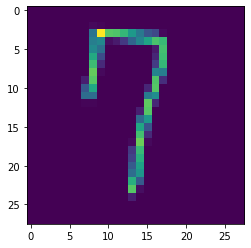

In [163]:
# 찍은 이미지를 예측해보자

print("Predict: {}".format(sess.run(tf.argmax(H,1), feed_dict={X:pix_arr4}))) 

plt.imshow(pix_arr4.reshape(28,28)) # 

#

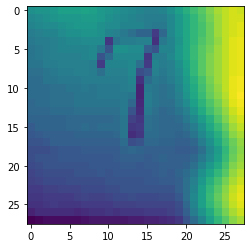

In [120]:
plt.imshow(pix_arr) # 

In [105]:
#pix1 = pix.reshape(1,784)

#plt.imshow(pix[0].reshape(28,28))

ValueError: cannot reshape array of size 720 into shape (28,28)